In [1]:
import numpy as np
import tqdm
from tqdm import tqdm
import torch
import os
import segmentation_models_pytorch as smp

In [2]:
print(torch.cuda.is_available())
device = "cuda:0"

True


In [3]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, data_path, label_path):
        self.data_path = data_path
        self.label_path = label_path
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def __len__(self):
        return len(os.listdir(self.data_path))

    def __getitem__(self, idx):
        ct = np.load(os.path.join(self.data_path, f"{idx}.npy"))
        mask = np.load(os.path.join(self.label_path, f"{idx}.npy"))

        ct = torch.Tensor(ct).to(self.device)
        mask = torch.Tensor(mask).to(self.device)

        return ct, mask

class DataGenerator:
    def __init__(self, batch_size):
        self.batch_size = batch_size
        self.ROOT_DATA_PATH = 'Task06_Lung/Preprocessed/train/data/'
        self.ROOT_LABEL_PATH = 'Task06_Lung/Preprocessed/train/label/'
        self.TEST_DATA_PATH = 'Task06_Lung/Preprocessed/test/data/'
        self.TEST_LABEL_PATH = 'Task06_Lung/Preprocessed/test/label/'

    def train_loader(self):
        dataset = CustomDataset(self.ROOT_DATA_PATH, self.ROOT_LABEL_PATH)
        return DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

    def test_loader(self):
        dataset = CustomDataset(self.TEST_DATA_PATH, self.TEST_LABEL_PATH)
        return DataLoader(dataset, batch_size=1, shuffle=False)

In [4]:
# Set the batch size
batch_size = 4

# Create an instance of the DataGenerator
data_generator = DataGenerator(batch_size)

# Get the training DataLoader
train_loader = data_generator.train_loader()

# Get the testing DataLoader
test_loader = data_generator.test_loader()

# # Iterate through the training DataLoader
# for batch_idx, (ct, mask) in enumerate(train_loader):
#     # Your training code here
#     print(f"Batch {batch_idx + 1}: CT Shape: {ct.shape}, Mask Shape: {mask.shape}")

# # # Iterate through the testing DataLoader
# # for batch_idx, (ct, mask) in enumerate(test_loader):
# #     # Your testing code here
# #     print(f"Batch {batch_idx + 1}: CT Shape: {ct.shape}, Mask Shape: {mask.shape}")


In [5]:
# class DataGenerator:
#     def __init__(self, batch_size):
#         self.batch_size = batch_size
#         self.ROOT_DATA_PATH = 'Task06_Lung/Preprocessed/train/data/'
#         self.ROOT_LABEL_PATH = 'Task06_Lung/Preprocessed/train/label/'
#         self.TEST_DATA_PATH = 'Task06_Lung/Preprocessed/test/data/'
#         self.TEST_LABEL_PATH = 'Task06_Lung/Preprocessed/test/label/'

#     def __len__(self):
#         for _, __, files in os.walk(self.ROOT_DATA_PATH):
#             return len(files)

#     def train_generate(self, size):
#         while True:
#             batch_count = 0
#             yield_list = []
#             for i in range(size):
#                     ct = np.load(self.ROOT_DATA_PATH + str(i) + ".npy")
#                     mask = np.load(self.ROOT_LABEL_PATH + str(i) + ".npy")

#                     ct = torch.Tensor(ct)
#                     mask = torch.Tensor(mask)
#                     ct = ct.to(device)
#                     mask = mask.to(device)
                    
#                     yield_list.append([ct, mask])
#                     batch_count += 1

#                     if batch_count == self.batch_size:
#                         yield yield_list
#                         batch_count = 0
#                         yield_list = []

#     def test_generate(self):
#         for _, __, files in os.walk(self.TEST_DATA_PATH):
#             for file in files:
#                 ct = np.load(self.TEST_DATA_PATH + file)
#                 mask = np.load(self.TEST_LABEL_PATH + file)

#                 ct = torch.Tensor(ct)
#                 mask = torch.Tensor(mask)
#                 ct = ct.to(device)
#                 mask = mask.to(device)
                    
#                 yield [[ct, mask]]         

In [6]:
# %%timeit
# datagen = DataGenerator(batch_size=1)
# iter = datagen.train_generate(datagen.__len__()) 
# data = next(iter)
# print(data[0][0], data[0][1])

In [7]:
# datagen = DataGenerator(batch_size=1)
# iter = datagen.test_generate() 
# data = next(iter)
# print(data[0][0], data[0][1])

In [8]:
# data[0][1]

In [9]:
# # for row in data[0][0]:
# #     print(row)

# data[0][0].shape

In [10]:
# type(data[0][0])

In [11]:
# len(data)

In [12]:
# import torch

# class DoubleConv(torch.nn.Module):
#     """
#     Helper Class which implements the intermediate Convolutions
#     """
#     def __init__(self, in_channels, out_channels):
        
#         super().__init__()
#         self.step = torch.nn.Sequential(torch.nn.Conv2d(in_channels, out_channels, 3, padding=1),
#                                         torch.nn.ReLU(),
#                                         torch.nn.Conv2d(out_channels, out_channels, 3, padding=1),
#                                         torch.nn.ReLU())
        
#     def forward(self, X):
#         return self.step(X)


# class UNet(torch.nn.Module):
#     """
#     This class implements a UNet for the Segmentation
#     We use 3 down- and 3 UpConvolutions and two Convolutions in each step
#     """

#     def __init__(self):
#         """Sets up the U-Net Structure
#         """
#         super().__init__()
        
        
#         ############# DOWN #####################
#         self.layer1 = DoubleConv(1, 64)
#         self.layer2 = DoubleConv(64, 128)
#         self.layer3 = DoubleConv(128, 256)
#         self.layer4 = DoubleConv(256, 512)

#         #########################################

#         ############## UP #######################
#         self.layer5 = DoubleConv(512 + 256, 256)
#         self.layer6 = DoubleConv(256+128, 128)
#         self.layer7 = DoubleConv(128+64, 64)
#         self.layer8 = torch.nn.Conv2d(64, 1, 1)
#         #########################################

#         self.maxpool = torch.nn.MaxPool2d(2)

#     def forward(self, x):
        
#         ####### DownConv 1#########
#         x1 = self.layer1(x)
#         x1m = self.maxpool(x1)
#         ###########################
        
#         ####### DownConv 2#########        
#         x2 = self.layer2(x1m)
#         x2m = self.maxpool(x2)
#         ###########################

#         ####### DownConv 3#########        
#         x3 = self.layer3(x2m)
#         x3m = self.maxpool(x3)
#         ###########################
        
#         ##### Intermediate Layer ## 
#         x4 = self.layer4(x3m)
#         ###########################

#         ####### UpCONV 1#########        
#         x5 = torch.nn.Upsample(scale_factor=2, mode="bilinear")(x4)  # Upsample with a factor of 2
#         x5 = torch.nn.ConvTranspose2d(512, 512, 2, 2)(x4)
#         x5 = torch.cat([x5, x3], dim=1)  # Skip-Connection
#         x5 = self.layer5(x5)
#         ###########################

#         ####### UpCONV 2#########        
#         x6 = torch.nn.Upsample(scale_factor=2, mode="bilinear")(x5)        
#         x6 = torch.nn.ConvTranspose2d(256, 256, 2, 2)(x5)
#         x6 = torch.cat([x6, x2], dim=1)  # Skip-Connection    
#         x6 = self.layer6(x6)
#         ###########################
        
#         ####### UpCONV 3#########        
#         x7 = torch.nn.Upsample(scale_factor=2, mode="bilinear")(x6)
#         x7 = torch.nn.ConvTranspose2d(128, 128, 2, 2)(x6)
#         x7 = torch.cat([x7, x1], dim=1)       
#         x7 = self.layer7(x7)
#         ###########################
        
#         ####### Predicted segmentation#########        
#         ret = self.layer8(x7)
#         return ret

In [13]:
# model = UNet()
model =  smp.Unet(
    encoder_name="efficientnet-b4",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=1,                      # model output channels (number of classes in your dataset)
)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = torch.nn.BCEWithLogitsLoss()

In [14]:
data = np.random.rand(1,1,256,256)
data = torch.Tensor(data)
data

tensor([[[[0.4410, 0.9328, 0.6920,  ..., 0.1352, 0.8815, 0.7523],
          [0.0449, 0.9885, 0.1048,  ..., 0.4494, 0.4590, 0.7687],
          [0.7016, 0.8223, 0.6329,  ..., 0.6993, 0.1805, 0.3788],
          ...,
          [0.1274, 0.6453, 0.2443,  ..., 0.7774, 0.9105, 0.2597],
          [0.4019, 0.3465, 0.8900,  ..., 0.5373, 0.2121, 0.8294],
          [0.9213, 0.4642, 0.1431,  ..., 0.0740, 0.0930, 0.4466]]]])

In [15]:
# from fvcore.nn import FlopCountAnalysis
# flops = FlopCountAnalysis(model, train_loader[0])
# flops.total() // 1e-9

In [16]:
# flops.by_operator()

In [17]:
# flops.by_module()

In [18]:
# flops.by_module_and_operator()

In [19]:
torch.device(device=device)

device(type='cuda', index=0)

In [20]:
model = model.to(device)

In [21]:
# size = datagen.__len__()
size = train_loader.__len__()
size

871

In [22]:
EPOCH = 20

In [24]:
for epoch in range(EPOCH):
    model.train()  # Set the model to training mode
    total_loss = 0.0

    for batch_idx, (ct, mask) in enumerate(train_loader):
        # Move data to the appropriate device
        ct, mask = ct.to(device), mask.to(device)

        # Forward pass
        outputs = model(ct)
        # outputs = 1 if outputs > 0.5 else 0

        # Compute the loss
        loss = criterion(outputs, mask)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print average loss for the epoch
    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{EPOCH}, Average Loss: {average_loss:.4f}")


Epoch 1/20, Average Loss: 0.0162
Epoch 2/20, Average Loss: 0.0018
Epoch 3/20, Average Loss: 0.0013
Epoch 4/20, Average Loss: 0.0011
Epoch 5/20, Average Loss: 0.0012
Epoch 6/20, Average Loss: 0.0010
Epoch 7/20, Average Loss: 0.0008
Epoch 8/20, Average Loss: 0.0011
Epoch 9/20, Average Loss: 0.0008
Epoch 10/20, Average Loss: 0.0008
Epoch 11/20, Average Loss: 0.0007
Epoch 12/20, Average Loss: 0.0006
Epoch 13/20, Average Loss: 0.0006
Epoch 14/20, Average Loss: 0.0008
Epoch 15/20, Average Loss: 0.0006
Epoch 16/20, Average Loss: 0.0006
Epoch 17/20, Average Loss: 0.0005
Epoch 18/20, Average Loss: 0.0007
Epoch 19/20, Average Loss: 0.0005
Epoch 20/20, Average Loss: 0.0005


In [ ]:
# for epoch in range(EPOCH):  # loop over the dataset multiple times

#     running_loss = 0.0
#     for i, (ct, mask) in tqdm(enumerate(train_loader)):
        
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = model(ct)
#         # labels = labels.cpu().numpy()
#         loss = loss_fn(outputs, mask)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
#             running_loss = 0.0

#         if i == size:
#             break


# print('Finished Training')

In [25]:
class DiceScore(torch.nn.Module):
    """
    class to compute the Dice Loss
    """
    def __init__(self):
        super().__init__()

    def forward(self, pred, mask):

        #flatten label and prediction tensors
        pred = torch.flatten(pred)
        mask = torch.flatten(mask)

        counter = (pred * mask).sum()  # Counter
        print(counter)
        denum = pred.sum() + mask.sum()
        print(denum)  # denominator
        dice = (2*counter)/denum

        return dice


In [26]:
preds = []
labels = []

for batch_idx, (ct, mask) in enumerate(test_loader):

    ct, mask = ct.to(device), mask.to(device)
        
    with torch.no_grad():
        pred = model(ct)
        
    pred = pred.cpu().numpy()
    pred = np.where(pred < 0.5, 0, 1)

    preds.append(pred)
    labels.append(mask.cpu().numpy())
    
preds = np.array(preds)
labels = np.array(labels)

In [27]:
dice_score = DiceScore()(torch.from_numpy(preds), torch.from_numpy(labels))
print(f"The Val Dice Score is: {dice_score}")

tensor(18422.)
tensor(66675.7500)
The Val Dice Score is: 0.552584707736969


In [28]:
preds

array([[[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]],



       [[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]],



       [[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]],



       ...,



       [[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]],



       [[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0

In [29]:
labels

array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       ...,



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
     

In [30]:
preds[0].sum()

0

In [31]:
labels[0].sum()

0.0

In [32]:
for i in range(len(preds)):
    if preds[i].sum() > 0:
        print(preds[i].sum(), labels[i].sum())

17 0.0
19 0.0
35 0.0
44 0.0
33 0.0
15 0.0
3 71.0
34 84.75
49 202.25
148 230.75
176 246.75
239 259.25
254 304.5
288 347.5
292 341.75
346 412.5
397 365.75
432 407.0
465 454.5
452 464.5
475 486.75
487 565.0
507 665.0
474 662.25
465 696.25
461 679.0
404 680.5
390 515.5
360 498.75
297 457.75
278 431.5
301 373.5
308 427.0
282 396.5
273 406.25
286 365.0
259 374.25
194 353.5
164 331.0
158 292.0
202 326.5
169 294.25
126 298.0
100 259.5
90 260.75
76 224.25
28 230.5
20 205.5
13 189.5
9 185.25
29 159.25
19 162.25
13 176.25
24 60.5
22 64.5
12 56.5
79 0.0
1 0.0
1 0.0
7 0.0
7 0.0
6 0.0
2 0.0
2 0.0
4 0.0
26 0.0
76 167.75
121 181.0
147 184.75
125 193.0
133 201.25
151 209.0
164 222.75
173 229.25
163 230.5
167 230.0
163 210.5
153 220.0
150 211.5
132 195.25
103 162.25
89 140.25
77 157.75
75 127.0
57 112.25
29 85.25
13 72.75
18 82.25
13 68.75
8 50.0
99 113.5
135 193.75
66 230.0
185 357.0
125 270.75
82 220.5
38 0.0
99 0.0
35 0.0
2 0.0
63 0.0
18 68.25
25 71.25
7 65.25
33 70.5
24 53.25
17 61.5
15 38.75
15 48.

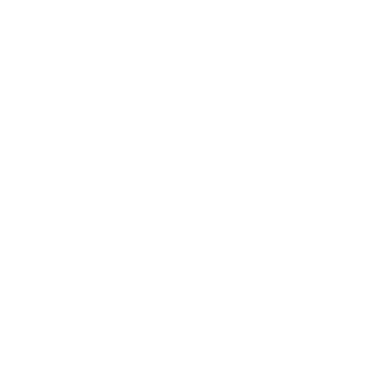

In [33]:
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
fig = plt.figure()
camera = Camera(fig)

for i in range(len(preds)):  # axial view
    plt.imshow(preds[i][0, 0, :, :], cmap="bone")
    plt.axis("off")
    camera.snap()

animation = camera.animate()
HTML(animation.to_html5_video())

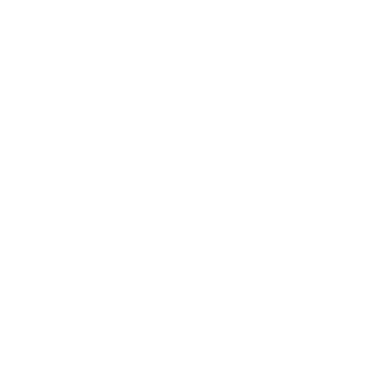

In [34]:
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
fig = plt.figure()
camera = Camera(fig)

for i in range(len(preds)):  # axial view
    plt.imshow(labels[i][0, 0, :, :], cmap="bone")
    plt.axis("off")
    camera.snap()

animation = camera.animate()
HTML(animation.to_html5_video())